In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from lib.data import get_ratings, set_ratings, set_items
from lib.utils import read_items_from_file, read_ratings_from_file, read_predictions_from_file

In [2]:
ALGORITHMS = ['cbf', 'item-item', 'mf', 'perbias', 'user-user']

ratings = read_ratings_from_file()
set_ratings(ratings)
ITEMS = read_items_from_file()
set_items(ITEMS)

width = 10 # inch
aspect = 0.8 # height/width ratio
height = width*aspect
plt.rcParams['figure.figsize'] = [width, height]

In [18]:
predicted_users = set()
predicted_items = set()
users_that_rated = set(ratings.columns[1:])

for algorithm in ALGORITHMS:
    predictions = read_predictions_from_file(algorithm)
    predicted_users = predicted_users | set(predictions.columns[1:])
    predicted_items = predicted_items | set(predictions['Item'])

users = predicted_users | users_that_rated 
    
print 'Number of Users that were predicted:', len(predicted_users)
print 'Number of Users that rated:', len(users_that_rated)
print 'Total number of users:', len(users)
print 'Number of rated Items:', len(ITEMS)
print 'Number of predicted Items:', len(predicted_items)

empty_ratings = sum(list(ratings.isnull().sum()))
print 'Empty ratings', empty_ratings
print 'Sparsity', float(empty_ratings)/float((len(users)*len(ITEMS)))

Number of Users that were predicted: 100
Number of Users that rated: 100
Total number of users: 100
Number of rated Items: 200
Number of predicted Items: 200
Empty ratings 18538
Sparsity 0.9269


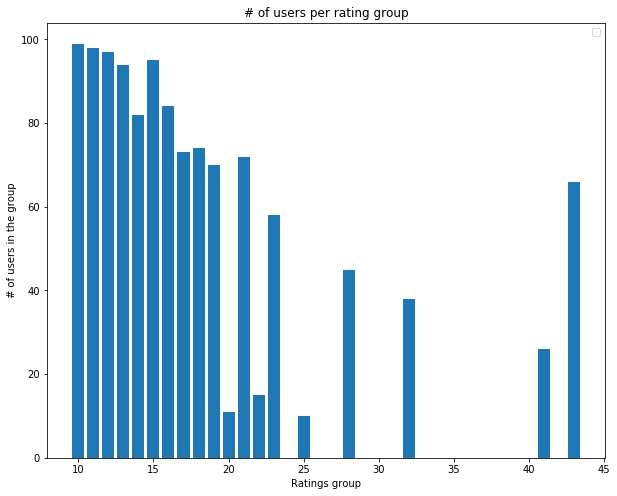

In [4]:
ratings_distribution = ratings.count()[1:]

fig, ax = plt.subplots()
    
ax.bar(ratings_distribution, range(len(ratings_distribution)))

ax.set_xlabel('Ratings group')
ax.set_ylabel('# of users in the group')
ax.set_title('# of users per rating group')
ax.legend()

plt.show()

In [5]:
df = pd.DataFrame(ratings_distribution).transpose()
df = df.rename(index={0: 'Users Count'})
df



,64,65,75,79,83,112,252,271,301,305,...,3411,3430,3524,3533,3625,3902,3991,4047,4342,4462
Users Count,14,10,11,12,14,10,15,15,10,13,...,11,13,10,15,13,15,10,12,11,10


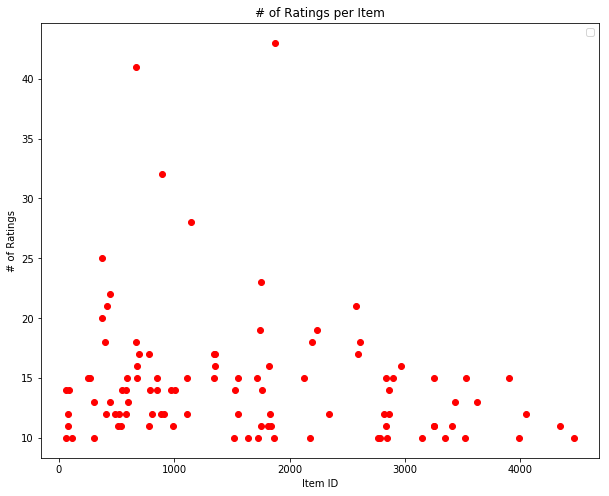

In [6]:
ratings

ratings_distribution = dict(ratings.count()[1:])
    
fig, ax = plt.subplots()
    
ax.plot([int(item) for item in ratings_distribution.keys()], ratings_distribution.values(), 'ro')

ax.set_xlabel('Item ID')
ax.set_ylabel('# of Ratings')
ax.set_title('# of Ratings per Item')
ax.legend()

plt.show()

In [7]:
df = pd.DataFrame.from_dict([ratings_distribution])
df = df.rename(index={0: 'Item Count'})
df

,1006,1107,1112,112,1147,1346,1348,1351,1355,1520,...,791,804,83,851,853,889,892,907,971,993
Item Count,14,15,12,10,28,17,15,16,17,10,...,14,12,14,14,15,12,32,12,14,11


In [8]:
popular_items = {}

for key, value in items_distribution.items():
    if value >= 15:
        popular_items[key] = value
        
fig, ax = plt.subplots()
    
ax.plot(popular_items.keys(), popular_items.values(), 'ro')

ax.set_xlabel('Item ID')
ax.set_ylabel('# of Ratings')
ax.set_title('# of Ratings per Item')
ax.legend()

plt.show()

NameError: name 'items_distribution' is not defined

In [ ]:
df = pd.DataFrame.from_dict([popular_items])
df = df.rename(index={0: 'Popular Items Count'})
df
